# Lab 4.02

### Import the necessary libraries if you are starting a new notebook. Using the same data as the previous lab: we_fn_use_c_marketing_customer_value_analysis.csv

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

### Find all of the categorical data. Save it in a categorical_df variable.


In [8]:
data_cat = data.select_dtypes(['object'])
data_num = data._get_numeric_data()

### Check for NaN values.

In [9]:
data.isnull().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

### Check all unique values of columns.

In [10]:
#https://www.statology.org/pandas-unique-values-in-column/

for col in data:
  print(data[col].unique())
  print(data[col].value_counts())

['BU79786' 'QZ44356' 'AI49188' ... 'TD14365' 'UP19263' 'Y167826']
OF46381    1
LR79755    1
CG13512    1
ON59472    1
XK33449    1
          ..
BH61137    1
LN20978    1
TQ33359    1
QV48556    1
DE21910    1
Name: Customer, Length: 9134, dtype: int64
['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: State, dtype: int64
[ 2763.519279  6979.535903 12887.43165  ...  8163.890428  7524.442436
  2611.836866]
2248.449633     6
10972.067780    6
5619.689084     6
11981.984810    6
2530.705137     6
               ..
12349.702320    1
4046.936065     1
2121.313061     1
7232.609391     1
3297.904615     1
Name: Customer Lifetime Value, Length: 8041, dtype: int64
['No' 'Yes']
No     7826
Yes    1308
Name: Response, dtype: int64
['Basic' 'Extended' 'Premium']
Basic       5568
Extended    2742
Premium      824
Name: Coverage, dtype: int64
['Bachelor' 'College' 'Master' 'High School or Below'

### Check dtypes. Do they all make sense as categorical data?

In [11]:
data_cat.dtypes
print(data['Response'])

# In my opinion these mostly do make sense as catagorical data. 
# You could argue that the date is not really usefull as a catagorical value.
# other than that the column costumer and costumer lifetime value are not usefull as categorical data. 

0        No
1        No
2        No
3        No
4        No
       ... 
9129     No
9130    Yes
9131     No
9132     No
9133     No
Name: Response, Length: 9134, dtype: object


### Does any column contain alpha and numeric data? Decide how to clean it.

In [12]:
# the costumer column is both alpha and numeric data. It depends on what you want to use the data for. but if you want to build a model.
# you could argue just to drop the table as it is just a random key assigned to that specific person.
# it should not have any effect on the data. 

### Would you choose to do anything else to clean or wrangle the categorical data? Comment your decisions.

In [13]:
# I would probably choose to take all the: 

# -customer lifetime value data, 
# -income data, Monthly premium, 
# -months since last claim, 
# -Months Since Policy Inception, 
# -total claim amount. 

# Assign the values to bins to make it easier to work with the information. 

### Compare policy_type and policy. What information is contained in these columns. Can you identify what is important?


In [14]:
print(data['Policy Type'])
print(data['Policy'])

#In these collumns you find information about the policy an policy type.
# by the looks of it the columns are directly corelated so we could probably use just the Policy column, as it contains all information as seen in the policy type column.

0       Corporate Auto
1        Personal Auto
2        Personal Auto
3       Corporate Auto
4        Personal Auto
             ...      
9129     Personal Auto
9130    Corporate Auto
9131    Corporate Auto
9132     Personal Auto
9133    Corporate Auto
Name: Policy Type, Length: 9134, dtype: object
0       Corporate L3
1        Personal L3
2        Personal L3
3       Corporate L2
4        Personal L1
            ...     
9129     Personal L1
9130    Corporate L3
9131    Corporate L2
9132     Personal L2
9133    Corporate L3
Name: Policy, Length: 9134, dtype: object


### Check number of unique values in each column, can they be combined in any way to ease encoding? Comment your thoughts and make those changes.

In [15]:
print(data['Policy Type'].unique())
print(data['Policy'].unique())

#Why would i want to concat columns that are already directly corelated and categorized? i dont understand the question.

['Corporate Auto' 'Personal Auto' 'Special Auto']
['Corporate L3' 'Personal L3' 'Corporate L2' 'Personal L1' 'Special L2'
 'Corporate L1' 'Personal L2' 'Special L1' 'Special L3']


In [16]:
print(data['Policy Type'].unique())
print(data['Policy Type'].value_counts())
print(data['Policy'].unique())
print(data['Policy'].value_counts())

['Corporate Auto' 'Personal Auto' 'Special Auto']
Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: Policy Type, dtype: int64
['Corporate L3' 'Personal L3' 'Corporate L2' 'Personal L1' 'Special L2'
 'Corporate L1' 'Personal L2' 'Special L1' 'Special L3']
Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: Policy, dtype: int64


# start of Lab 4.03

### Open the categoricals variable we created before.

In [17]:
print(data_cat.columns)

data_cat.head(50)

Index(['Customer', 'State', 'Response', 'Coverage', 'Education',
       'Effective To Date', 'EmploymentStatus', 'Gender', 'Location Code',
       'Marital Status', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')


,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
5,OC83172,Oregon,Yes,Basic,Bachelor,1/25/11,Employed,F,Rural,Married,Personal Auto,Personal L3,Offer2,Web,Two-Door Car,Medsize
6,XZ87318,Oregon,Yes,Basic,College,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Four-Door Car,Medsize
7,CF85061,Arizona,No,Premium,Master,1/18/11,Unemployed,M,Urban,Single,Corporate Auto,Corporate L3,Offer1,Agent,Four-Door Car,Medsize
8,DY87989,Oregon,Yes,Basic,Bachelor,1/26/11,Medical Leave,M,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Agent,Four-Door Car,Medsize
9,BQ94931,Oregon,No,Extended,College,2/17/11,Employed,F,Urban,Married,Special Auto,Special L2,Offer2,Branch,Four-Door Car,Medsize


### Plot all the categorical variables with the proper plot. What can you see?

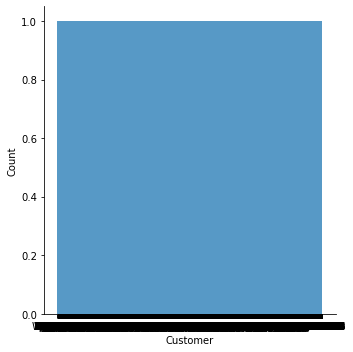

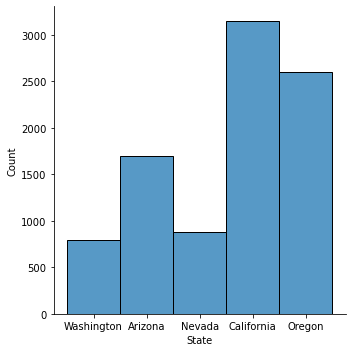

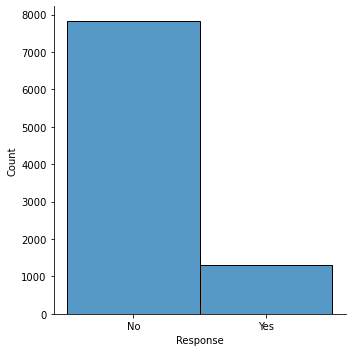

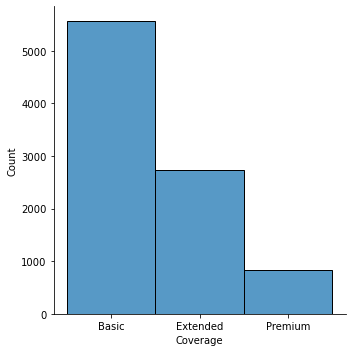

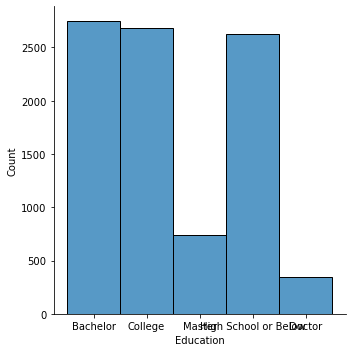

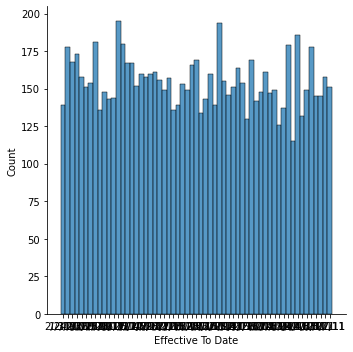

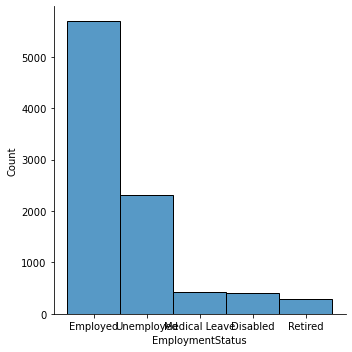

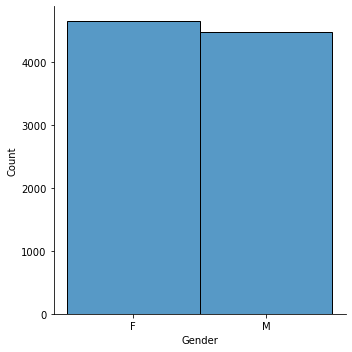

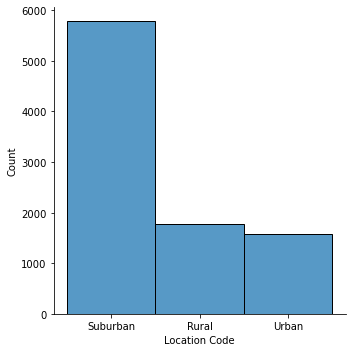

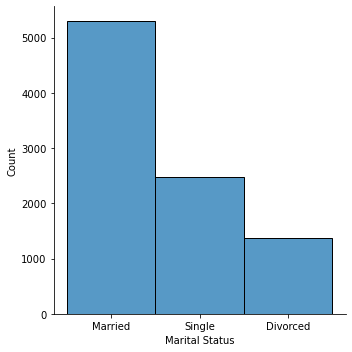

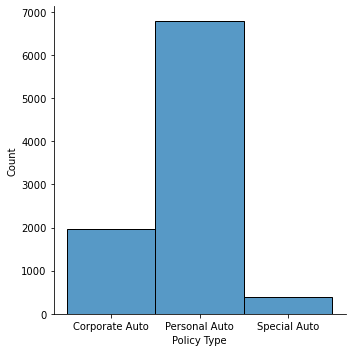

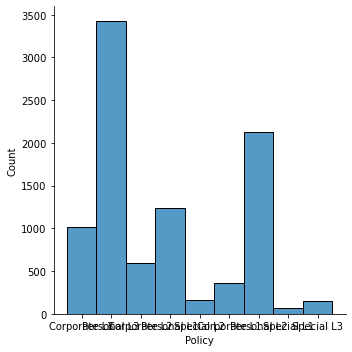

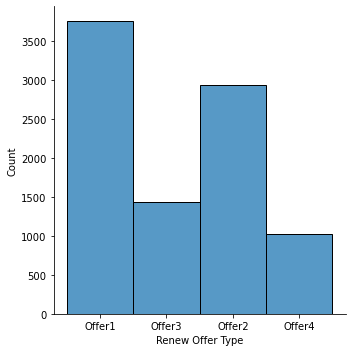

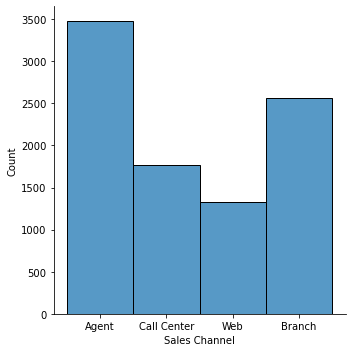

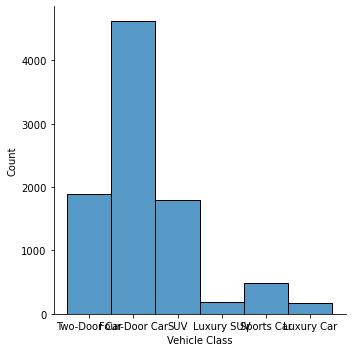

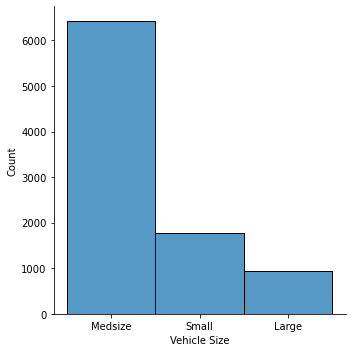

In [18]:
%matplotlib inline

for column in data_cat.columns:
    sns.displot(data_cat[column])
    plt.show()

### There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

In [19]:
# as stated somewhere in a previous lab, it looks to me that the customer catagory is redundant.
# Also the collumn effective to date seems redundant. You could also drop one of the policy collumns after what was asked
# last lab.

### Plot time variable. Can you extract something from it?

In [20]:
# for column in data_cat.columns:
#     sns.displot(x=data_cat['Effective To Date'],y=data_cat[column])
#     plt.show()

#Dont run this^

# maybe if we bin dates is might be more usefull

# Start of lab 4.05 
##  Lab | Comparing regression models

### 1. separate the data.

In [21]:
data_num.dtypes

Customer Lifetime Value          float64
Income                             int64
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Total Claim Amount               float64
dtype: object

C:\Users\Tom\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


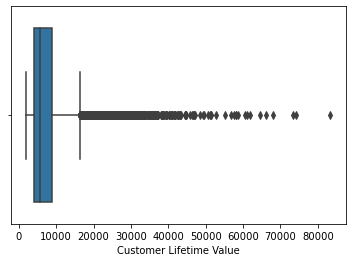

C:\Users\Tom\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


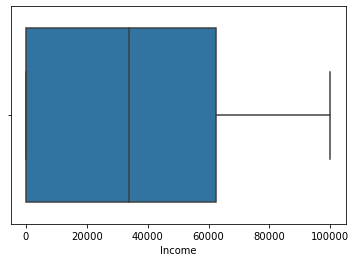

C:\Users\Tom\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


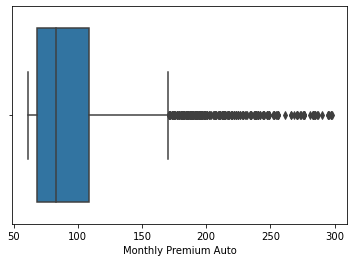

C:\Users\Tom\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


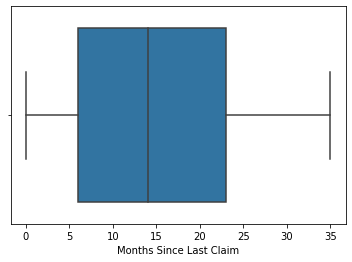

C:\Users\Tom\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


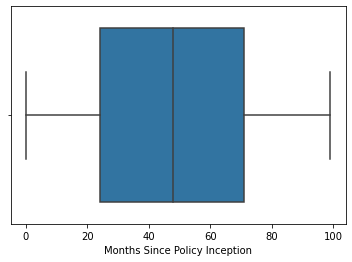

C:\Users\Tom\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


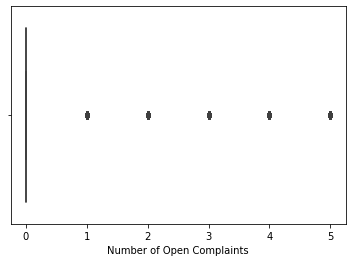

C:\Users\Tom\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


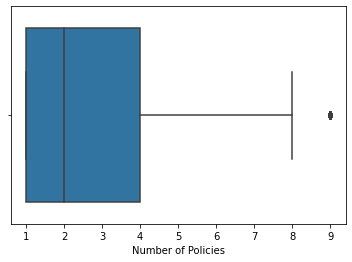

C:\Users\Tom\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


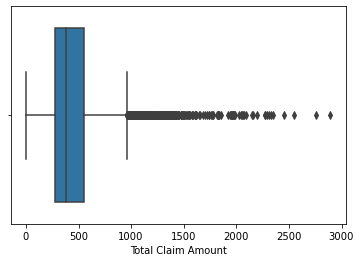

In [22]:
# i already have a num and cat veriable defined, now i need to clean and remove any outliers

for col in data_num:
    sns.boxplot(data_num[col])
    plt.show()

# here we see Customer Lifetime Value and Total claim amount have great outliers.


# 2. We will start with removing outliers, if you have not already done so

In [23]:
# print(data_num['Customer Lifetime Value'].describe())

# print("Highest allowed",data_num['Customer Lifetime Value'].mean() + 3*data_num['Customer Lifetime Value'].std())

# print("Lowest allowed",data_num['Customer Lifetime Value'].mean() - 3*data_num['Customer Lifetime Value'].std())
# # The lowest value does not make sense so we keep it at 0 for this variable

# border_clv = data_num['Customer Lifetime Value'].mean() + 3*data_num['Customer Lifetime Value'].std()
# # defined the upper limit for easier cleaning

# data_num[(data_num['Customer Lifetime Value'] > border_clv)] #<---these are the outliers

# data_num['clv_clean'] = data_num['Customer Lifetime Value'] < border_clv #

# print(data_num['clv_clean'].describe())

# data_num.head(10)

#####################
#I was doing it wrong, i will apply a logfunction because i want to keep the data that otherwise would be lost during cleaning
#####################

C:\Users\Tom\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AxesSubplot(0.125,0.125;0.775x0.755)


Text(0.5, 0.98, 'Distribution after Log transfomation')

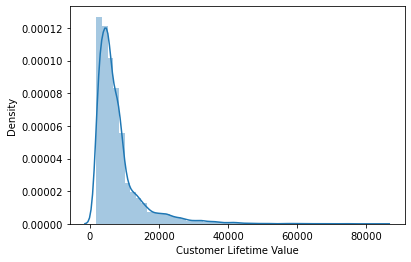

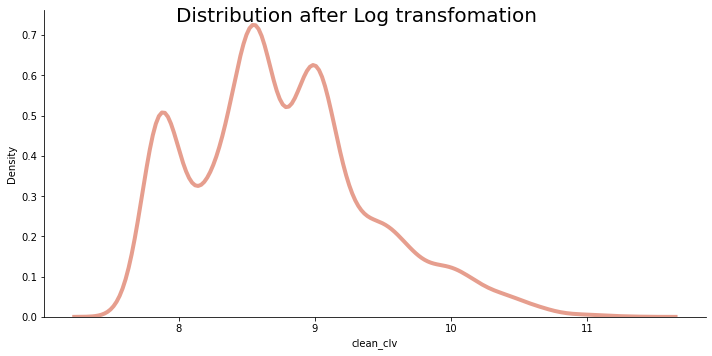

In [24]:
#got some help from https://www.malicksarr.com/how-to-normalize-your-data-with-python/

print(sns.distplot(data_num['Customer Lifetime Value']))

data_num['clean_clv'] = np.log(data_num['Customer Lifetime Value'])

ax = sns.displot(data_num['clean_clv'], kind = "kde",color = "#e69e8e", height=5, aspect=2,
            linewidth = 4 )

ax.fig.suptitle('Distribution after Log transfomation', size = 20)

AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\Tom\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0.98, 'Distribution after Log transfomation')

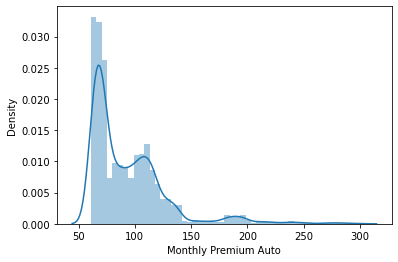

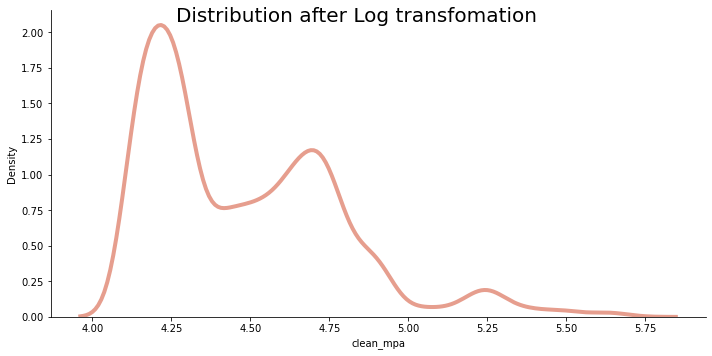

In [25]:
print(sns.distplot(data_num['Monthly Premium Auto']))

data_num['clean_mpa'] = np.log(data_num['Monthly Premium Auto'])

ax = sns.displot(data_num['clean_mpa'], kind = "kde",color = "#e69e8e", height=5, aspect=2,
            linewidth = 4 )

ax.fig.suptitle('Distribution after Log transfomation', size = 20)

AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\Tom\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0.98, 'Distribution after Log transfomation')

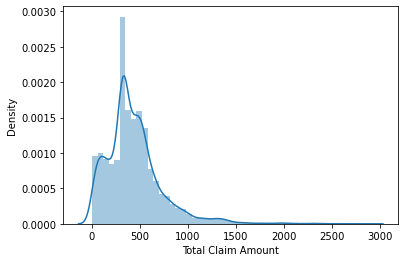

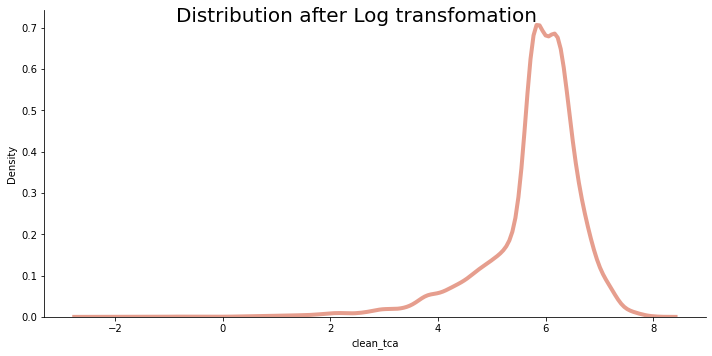

In [26]:
print(sns.distplot(data_num['Total Claim Amount']))

data_num['clean_tca'] = np.log(data_num['Total Claim Amount'])

ax = sns.displot(data_num['clean_tca'], kind = "kde",color = "#e69e8e", height=5, aspect=2,
            linewidth = 4 )

ax.fig.suptitle('Distribution after Log transfomation', size = 20)

### 3. Create a copy of the dataframe for the data wrangling.

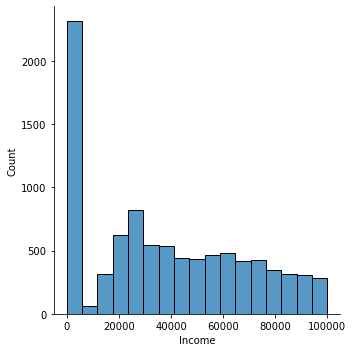

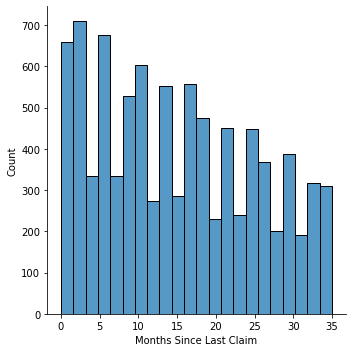

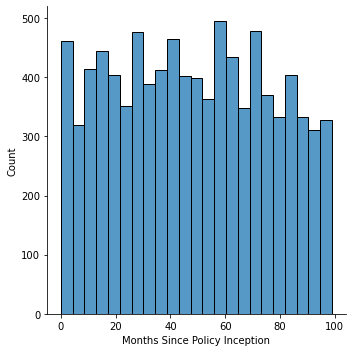

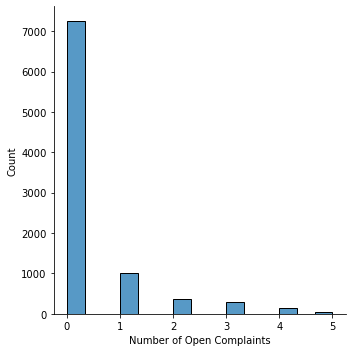

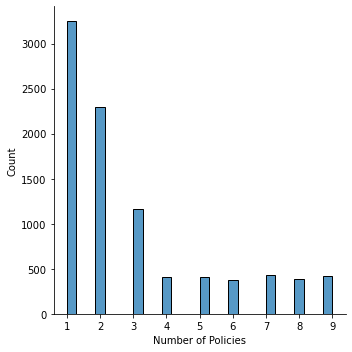

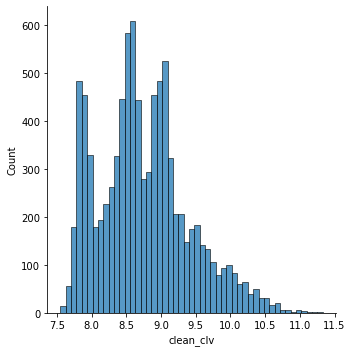

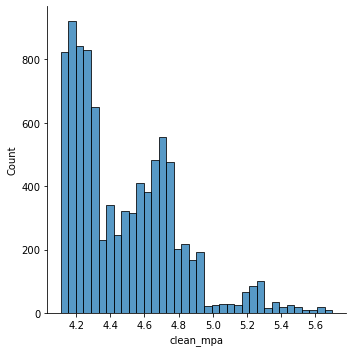

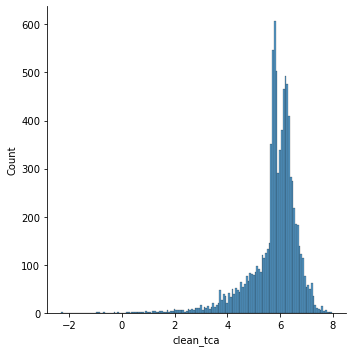

In [28]:
data_num_org = data_num
data_num_log = data_num.drop(data_num[['Total Claim Amount','Monthly Premium Auto','Customer Lifetime Value']], axis=1)

for column in data_num_log.columns:
    sns.displot(data_num_log[column])
    plt.show()
#plot for checking if the data is looking cleaner as expected

In [90]:
data_2 = pd.concat([data_cat,data_num_log], axis=1)
data_2.columns
#concat the normalized numericals with original data in new DFv

Index(['Customer', 'State', 'Response', 'Coverage', 'Education',
       'Effective To Date', 'EmploymentStatus', 'Gender', 'Location Code',
       'Marital Status', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Vehicle Class', 'Vehicle Size', 'Income',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'clean_clv',
       'clean_mpa', 'clean_tca'],
      dtype='object')

### 4. Normalize the continuous variables. You can use any one method you want.

In [91]:
def var_type (data_2):
    continuous_df = []
    discrete_df = []
    for column in data_2.columns:
        
        if len(data_2[col].unique()) < data.shape[0] * 0.01: 
            continuous_df.append(col)
        
        else:
            discrete_df.append(col)
        return continuous_df,discrete_df

data_2.apply(var_type)

# print(data_2.dtypes)

print(data_2['Income'].value_counts())

# my function for splitting does not want to work, so ill do it manually

AttributeError: 'Series' object has no attribute 'columns'

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=420)